### Solar Panel Placement Optimization Notebook 

We recommend to write your code in Python, so that your workflow can be seen using this notebook. However, feel free to use other languages and tools that you are comfortable with. 

Please generate images to illustrate how your algorithm works. 

Have fun! 

#### Class Definition - LayoutOptimisation
Class variables and instance variables are initialised according to the rooftop and type of panel to be used. These variables will then be used in the other methods. 

Boundary distance (distance from the boundary) has been assumed to be the same as the panel distance.

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

class LayoutOptimisation:
    panel_distance = 0.02
    row_distance = 0.5
    # Assume distance from boundary is panel distance
    boundary_distance = panel_distance

    def __init__(self, selected_rooftop, panel):
        selected_rooftop_coords = selected_rooftop + [selected_rooftop[0]]

        rooftop = Polygon(selected_rooftop_coords)
        self.rooftop = rooftop

        xs, ys = zip(*rooftop.exterior.coords) 
        self.xs = xs
        self.ys = ys

        self.min_x = min(xs)
        self.max_x = max(xs)
        self.min_y = min(ys)
        self.max_y = max(ys)

        self.panel_length = panel[0]
        self.panel_width = panel[1]


Helper function to get the coordinates of a panel (rectangle).
x and y represent the coordinates of the bottom left vertex.

In [ ]:
def get_panel_coords(self, x, y, length, width):
    return [(x, y), (x + length, y), (x, y + width), (x + length, y + width)]

The get_layout method returns the list of coordinates of the panels in a rooftop.
Starting from min_x and min_y, which are the coordinates of the bottom-left vertex of the rooftop, we check if a panel with these coordinates (bottom-left vertex) is fully contained within the boundaries of the rooftop. 

If yes, the coordinates will then be appended to the list of coordinates. From there, we increment y by the height of the panel and y_gap, which represents the distance between the panels. 
In this case, y_gap could be either row_distance or panel_distance, as a row can either run horizontally or vertically depending from the point of view. 

Once the coordinates of a panel exceeds the max_y of a coordinate, it means that it is definitely no longer within the rooftop's boundaries, and the loop is broken. We then increment x by the width of the panel and x_gap (similar to y_gap).

In [ ]:
def get_layout(self, panel_length, panel_width, x_gap, y_gap):
    x = self.min_x + self.boundary_distance
    coord_list = []

    while (self.max_x > x):
        y = self.min_y + self.boundary_distance

        while (self.max_y > y):
            panel_coords = self.get_panel_coords(x, y, panel_length, panel_width)
            panel_geometry = Polygon(panel_coords)

            if self.rooftop.contains_properly(panel_geometry):             
                coord_list.append((x,y))

            y += panel_width
            y += y_gap

        x += panel_length
        x += x_gap

    return coord_list

The get_best_layout method returns the optimal layout from all the layout permutations. This is done by utilizing the get_layout method above. In this case, the only permutations are the result of the swap between x_gap and y_gap, as well as the swap in panel_width and panel_height (effectively a rotation of 90 degrees).

In [ ]:
def get_best_layout(self):
    permutations = [{"panel_length": self.panel_length, "panel_width": self.panel_width, "x_gap": self.row_distance, "y_gap": self.panel_distance},
                    {"panel_length": self.panel_length, "panel_width": self.panel_width, "x_gap": self.panel_distance, "y_gap": self.row_distance},
                    {"panel_length": self.panel_width, "panel_width": self.panel_length, "x_gap": self.row_distance, "y_gap": self.panel_distance},
                    {"panel_length": self.panel_width, "panel_width": self.panel_length, "x_gap": self.panel_distance, "y_gap": self.row_distance}]

    chosen_permutation = permutations[0]
    chosen_permutation_coords = []

    for permutation in permutations:
        coord_list = self.get_layout(panel_length=permutation["panel_length"], 
                                     panel_width=permutation["panel_width"], 
                                     x_gap=permutation["x_gap"], 
                                     y_gap=permutation["y_gap"])
            
        if len(coord_list) > len(chosen_permutation_coords):
            chosen_permutation = permutation
            chosen_permutation_coords = coord_list

    return {"chosen_permutation": chosen_permutation, "chosen_permutation_coords": chosen_permutation_coords}

The visualise method uses matplotlib to display the best layout on the rooftop for visualisation purposes.

In [ ]:
def visualise(self, chosen_permutation, chosen_permutation_coords):
    plt.figure()
    plt.plot(self.xs, self.ys, label="Rooftop")    

    for i, j in chosen_permutation_coords:
        rectangle = plt.Rectangle((i, j), chosen_permutation["panel_length"], chosen_permutation["panel_width"], facecolor='g', edgecolor="b")

        plt.gca().add_patch(rectangle)
        
    plt.show()

Finally, the entry point to the code is the generate_layout function, which takes in the rooftop and panel as parameters. This function initialises the LayoutOptimisation class, and obtains the best layout as well as calls the visualise method.

In [ ]:
def generate_layout(selected_rooftop, panel):
    layout = LayoutOptimisation(selected_rooftop, panel)

    best_layout = layout.get_best_layout()
    chosen_permutation = best_layout["chosen_permutation"]
    chosen_permutation_coords = best_layout["chosen_permutation_coords"]

    layout.visualise(chosen_permutation=chosen_permutation, chosen_permutation_coords=chosen_permutation_coords)


panel_sizes = [(2, 1), (2.3, 1), (1.8, 0.9)]

rooftop1_coords = [(0,0), (0, 100), (50, 0)]
rooftop2_coords = [(1.12, 130.83), (1.12, 160.83), (31.12, 160.83), (31.12, 130.83), (11.12, 100.83), (-11.12, 90.83), (-30.12, 90.83), (-20.182, 120.273)]
rooftop3_coords = [(2, 100), (2,160), (131, 160), (35, 200), (11, 300), (-20 , 90), (30, 90)]


generate_layout(rooftop1_coords, panel_sizes[0])

#### Generated Images:

Rooftop 1:

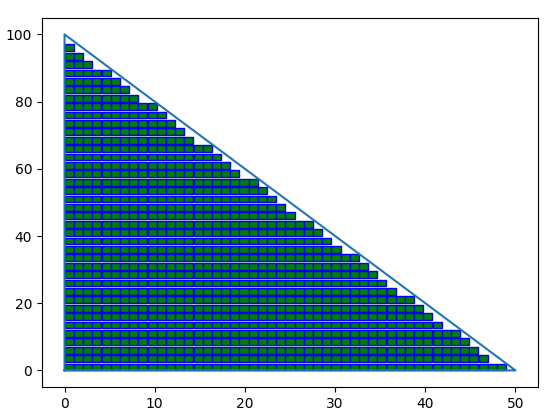

Rooftop 2:

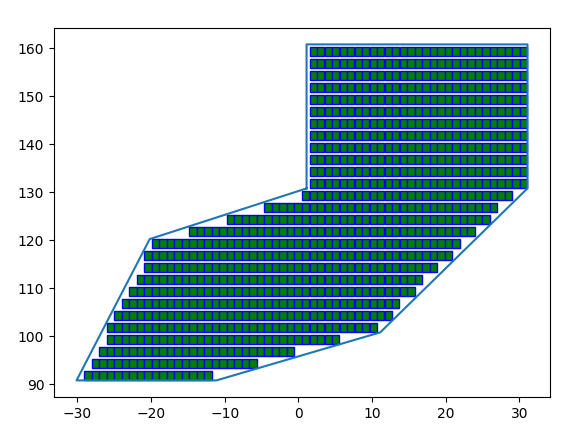

Rooftop 3:

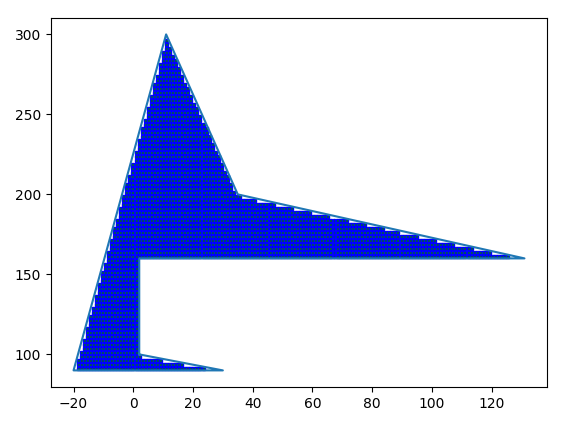


#### Limitations

Due to time constraints (since only 2h should be spent on the assignment), I have yet to implement the rotation of the panels. However, these would be the steps I would take to implement this functionality:

1. Obtain the optimal rotation value for the rooftop. This could be done in 2 ways: 
    - Brute force: count the number of panels that can be placed for each degree of rotation
    - Use the boundaries of the rooftop as a guideline. Panels could be placed parallel to boundaries in order to minimize empty spaces between the panels and the boundary.

2. Panels would have to be stacked at an angle instead of vertically. Some refactoring of code would be necessary - e.g. instead of incrementing x and y by the panel width and height, we would need to calculate the distance between the coordinates of each panel using trigonometry. 